Linear regression.

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [84]:
# read data

filepath = '../Data/'
DATA_dict = dict()
num_traj = 40
for i in range(num_traj):
    num = i+1;
    if num >= 10:
        str_num = str(num) # no leading zero
    else:
        str_num = '0'+str(num) # add leading zero
    filename = 'trajdata_'+str_num+'.csv'
    with open(filepath+filename, 'r') as f:
        # remove top row, and store the rest in dictionary
        DATA_dict[i] = np.genfromtxt(f, dtype='f4', delimiter=',', skip_header=1)

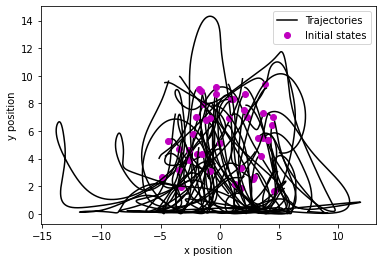

In [68]:
# Plot all position trajectories

for i in range(num_traj-1):
    curr_traj = DATA_dict[i]
    plt.plot(curr_traj[:,1],curr_traj[:,2],'k-') # plot trajectory path
    plt.plot(curr_traj[0,1],curr_traj[0,2],'mo') # plot initial position

# Show legend on last trajectory
curr_traj = DATA_dict[num_traj-1]
plt.plot(curr_traj[:,1],curr_traj[:,2],'k-',label='Trajectories')
plt.plot(curr_traj[0,1],curr_traj[0,2],'mo',label='Initial states')

plt.xlabel('x position')
plt.ylabel('y position')
plt.legend()
plt.show()

In [85]:
# Add 10% Gaussian noise to data

percentage = 0.10

for i in range(num_traj):
    stdd = np.std(DATA_dict[i][:,1:], axis=0)
    for j in range(std.shape[0]):
        noise = np.random.normal(0, stdd[j], DATA_dict[i][:,j+1].size) * percentage
        DATA_dict[i][:,j+1] = DATA_dict[i][:,j+1] + noise

## Learn from one trajectory

In [86]:
# We select the first trajectory as the training set
X = DATA_dict[0][:-1,1:]
Y = DATA_dict[0][1:,1:4]

In [87]:
reg = LinearRegression().fit(X, Y)

In [88]:
print('The matrix coefficient is\n',reg.coef_)
print('The vector intercept is\n',reg.intercept_)

The matrix coefficient is
 [[ 7.5707841e-01  4.9918848e-01 -7.4307568e-02  1.7668009e-03
   4.2351056e-04]
 [ 9.6931957e-02  7.6109880e-01  1.9816030e-02 -7.2741508e-04
  -4.2795390e-04]
 [-1.4105685e-02  1.6243931e-02  9.1407311e-01 -4.0754676e-05
  -1.1265241e-03]]
The vector intercept is
 [-2.8359227   1.1646688  -0.16531166]


In [89]:
# We select the last trajectory as the test set
X_test = DATA_dict[39][:-1,1:]
Y_test = DATA_dict[39][1:,1:4]

In [90]:
R2 = reg.score(X_test, Y_test)
print('The R^2 score is', R2)

The R^2 score is 0.23120284948524308


In [91]:
Y_pred = reg.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)
print('The MSE is',MSE)

The MSE is 3.6940877


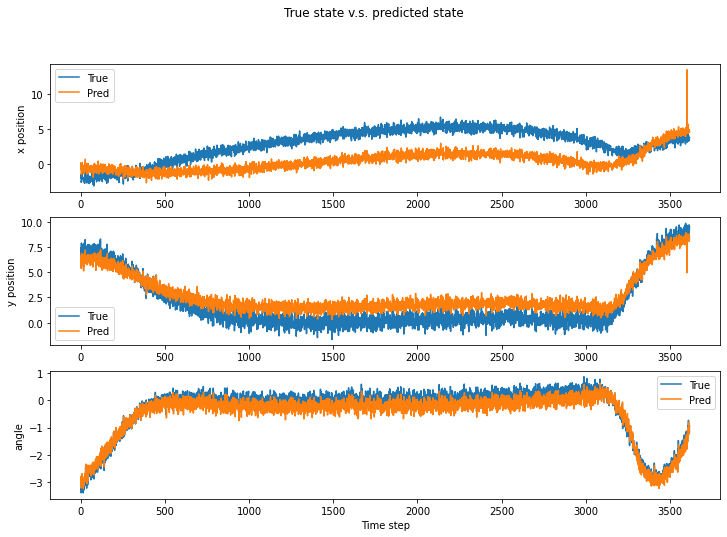

In [92]:
T = range(Y_test.shape[0])
fig, axs = plt.subplots(3,figsize=[12,8])
fig.suptitle('True state v.s. predicted state')
axs[0].plot(T,Y_test[:,0], T,Y_pred[:,0])
axs[1].plot(T,Y_test[:,1], T,Y_pred[:,1])
axs[2].plot(T,Y_test[:,2], T,Y_pred[:,2])
axs[0].set_ylabel('x position')
axs[1].set_ylabel('y position')
axs[2].set_ylabel('angle')
axs[2].set_xlabel('Time step')
axs[0].legend(['True','Pred'])
axs[1].legend(['True','Pred'])
axs[2].legend(['True','Pred'])

In [58]:
fig.savefig('linear-one-traj-learn.png')

## Learn from multiple trajectory

In [93]:
# We select the first 30 trajectory as the training set
X = np.zeros((0,5))
Y = np.zeros((0,3))
N = 30
for i in range(N):
    X = np.vstack((X,DATA_dict[i][:-1,1:]))
    Y = np.vstack((Y,DATA_dict[i][1:,1:4]))

In [94]:
reg2 = LinearRegression().fit(X, Y)
print('The matrix coefficient is\n',reg2.coef_)
print('The vector intercept is\n',reg2.intercept_)

The matrix coefficient is
 [[ 9.88428331e-01  4.55350141e-04  5.17949201e-03 -4.51040372e-06
   4.19814017e-05]
 [ 3.69325363e-04  9.73806527e-01  1.85806319e-03 -3.06721774e-04
   2.11817701e-05]
 [ 2.12989682e-03  1.16093097e-03  9.84845841e-01  3.19121038e-05
  -1.58654539e-04]]
The vector intercept is
 [-0.00040903  0.10854997 -0.01561577]


In [95]:
# We select the last 10 trajectory as the test set
X_test = np.zeros((0,5))
Y_test = np.zeros((0,3))

X_test = np.zeros((0,5))
Y_test = np.zeros((0,3))
M = 10
for i in range(M):
    X_test = np.vstack((X_test,DATA_dict[39-i][:-1,1:]))
    Y_test = np.vstack((Y_test,DATA_dict[39-i][1:,1:4]))

In [96]:
R2 = reg2.score(X_test, Y_test)
print('The R^2 score is', R2)

The R^2 score is 0.9488027528804571


In [97]:
Y_pred = reg2.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)
print('The MSE is',MSE)

The MSE is 0.4620423344151762


In [98]:
X_test_last = DATA_dict[39][:-1,1:]
Y_test_last = DATA_dict[39][1:,1:4]
Y_pred = reg2.predict(X_test_last)

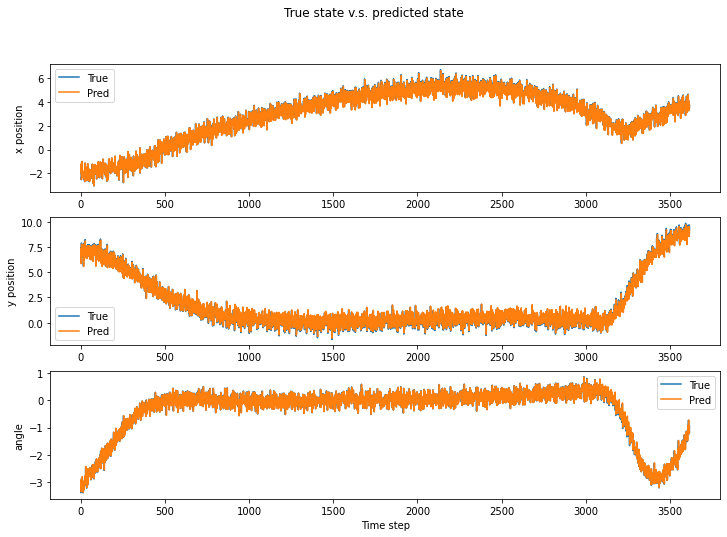

In [99]:
T = range(Y_test_last.shape[0])
fig, axs = plt.subplots(3,figsize=[12,8])
fig.suptitle('True state v.s. predicted state')
axs[0].plot(T,Y_test_last[:,0], T,Y_pred[:,0])
axs[1].plot(T,Y_test_last[:,1], T,Y_pred[:,1])
axs[2].plot(T,Y_test_last[:,2], T,Y_pred[:,2])
axs[0].set_ylabel('x position')
axs[1].set_ylabel('y position')
axs[2].set_ylabel('angle')
axs[2].set_xlabel('Time step')
axs[0].legend(['True','Pred'])
axs[1].legend(['True','Pred'])
axs[2].legend(['True','Pred'])

In [36]:
fig.savefig('linear-multi-traj-learn.png')